## This work continues from 2024-11-19_Sig_Overlay.jpynb

In [1]:
#load packages I need
import os
import scanpy as sc
import pandas as pd
import seaborn as sns
import dandelion as ddl
import matplotlib.pyplot as plt

In [2]:
#show current directory 
os.getcwd()
os.chdir('/scratch/user/s4436039/scdata/Python_Integration_Sep')
os.getcwd()

'/scratch/user/s4436039/scdata/Python_Integration_Sep'

In [3]:
sc.logging.print_header()

scanpy==1.10.2 anndata==0.10.8 umap==0.5.6 numpy==1.26.4 scipy==1.14.0 pandas==2.2.2 scikit-learn==1.5.0 statsmodels==0.14.2 igraph==0.11.5 pynndescent==0.5.12


In [4]:
ddl.logging.print_header()

dandelion==0.3.8 pandas==2.2.2 numpy==1.26.4 matplotlib==3.9.2 networkx==3.3 scipy==1.14.0


In [5]:
# read in data
data = sc.read_h5ad('NRclean_clustered2.h5ad')
data_DC = sc.read_h5ad('NRclean_clustered2_DC.h5ad')

In [6]:
data

AnnData object with n_obs × n_vars = 498023 × 1268
    obs: 'nCount_RNA', 'nFeature_RNA', 'sample_type', 'cancer_type', 'patient_id', 'sample_id', 'percent.mt', 'site', 'sample_type_major', 'cancer_subtype', 'integration_id', 'ident', 'dataset_id', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'S_score', 'G2M_score', 'keep_or_remove', 'leiden', 'celltype', 'leiden_DC', 'leiden_DC_v2', 'exclude_annots', 'leiden_M', 'Technology', 'cancer_type_broad', 'clean-leiden_0.8', 'clean-subcluster', 'clean-subcluster-v2', 'YS_sig', 'HSC_sig', 'CD5nDC2_up_vDC3', 'DC3_up_vCD5nDC2', 'CD5pDC2_up_vDC3', 'DC3_up_vCD5pDC2', 'DC3_up_vMono', 'Mono_up_vDC3', 'DC1_sig', 'DC2_sig', 'DC3_sig', 'DC_Axl_sig', 'DC2_up_DC3', 'DC3_up_DC2', 'mregDC_sig', 'cDC1_mregDC', 'cDC2_mregDC', 'NR_annotati

In [7]:
data_DC

AnnData object with n_obs × n_vars = 30241 × 1268
    obs: 'nCount_RNA', 'nFeature_RNA', 'sample_type', 'cancer_type', 'patient_id', 'sample_id', 'percent.mt', 'site', 'sample_type_major', 'cancer_subtype', 'integration_id', 'ident', 'dataset_id', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'S_score', 'G2M_score', 'keep_or_remove', 'leiden', 'celltype', 'leiden_DC', 'leiden_DC_v2', 'exclude_annots', 'leiden_M', 'Technology', 'cancer_type_broad', 'clean-leiden_0.8', 'clean-subcluster', 'clean-subcluster-v2', 'YS_sig', 'HSC_sig', 'CD5nDC2_up_vDC3', 'DC3_up_vCD5nDC2', 'CD5pDC2_up_vDC3', 'DC3_up_vCD5pDC2', 'DC3_up_vMono', 'Mono_up_vDC3', 'DC1_sig', 'DC2_sig', 'DC3_sig', 'DC_Axl_sig', 'DC2_up_DC3', 'DC3_up_DC2', 'mregDC_sig', 'cDC1_mregDC', 'cDC2_mregDC', 'NR_annotatio

### Overlay my tumour uptake sig: 

In [8]:
#make an object with my sig - see excel file Nikita-mregDC_DEG_summary on i drive
Uptake_sig = ["CCL22","IL4I1","SIRPA","CCR7","CHST11","GPR157","RGS1","BIRC3","TRAF1","CSF2RA","TBC1D13","LAMP3","MREG","PPP1R14A","SPRED2","CD83","TXN","MOB3A","NFKB1","TBC1D4","CDK2","WFDC21P","ARAP2","ZER1","ACSL1","SPINT2","SQSTM1","TBC1D8","JAG1","AC073508.3","BATF","ETV3","BCL2","KIF2A","FSCN1","TNFAIP3","CCDC28B","NR4A3","CYTIP","PLEK","FOXO1","TOMM34","TRAFD1","PPP1R16B","CXCR4","CD40","ENTPD7","CDKN1A","BID","MARCKS","DUSP5","MAP4K4","BCL2L1","ISG20","RNF145","RNF121","GPR132","RASGEF1B","CYRIA","RAB10","CERS6","IL1R1","STK4","CLEC2D","AL390719.1","ZBTB38","IFNGR2","CD274","SLC41A2","NRP2","ANKRD33B","GPR183","POGLUT1","ADORA2A","JADE3","KHDRBS3","CTNNB1","SLCO5A1","NFKB2","RGS2","SEC61B","ZNRF1","RELB","C12orf45","IRF2","EPOP","MXD1","RAB5B","PADI2","DRAM1","MTMR4","EEF2K","GCNT2","RAPH1","BCL2A1","SEC23B","PIM3","ANTXR2","ABTB2","TMEM200A"]    

In [9]:
#score genes
sc.tl.score_genes(data, Uptake_sig, score_name='Uptake_score')
sc.tl.score_genes(data_DC, Uptake_sig, score_name='Uptake_score')

In [10]:
colour_vars = ["Uptake_score","NR_annotations_simple"]

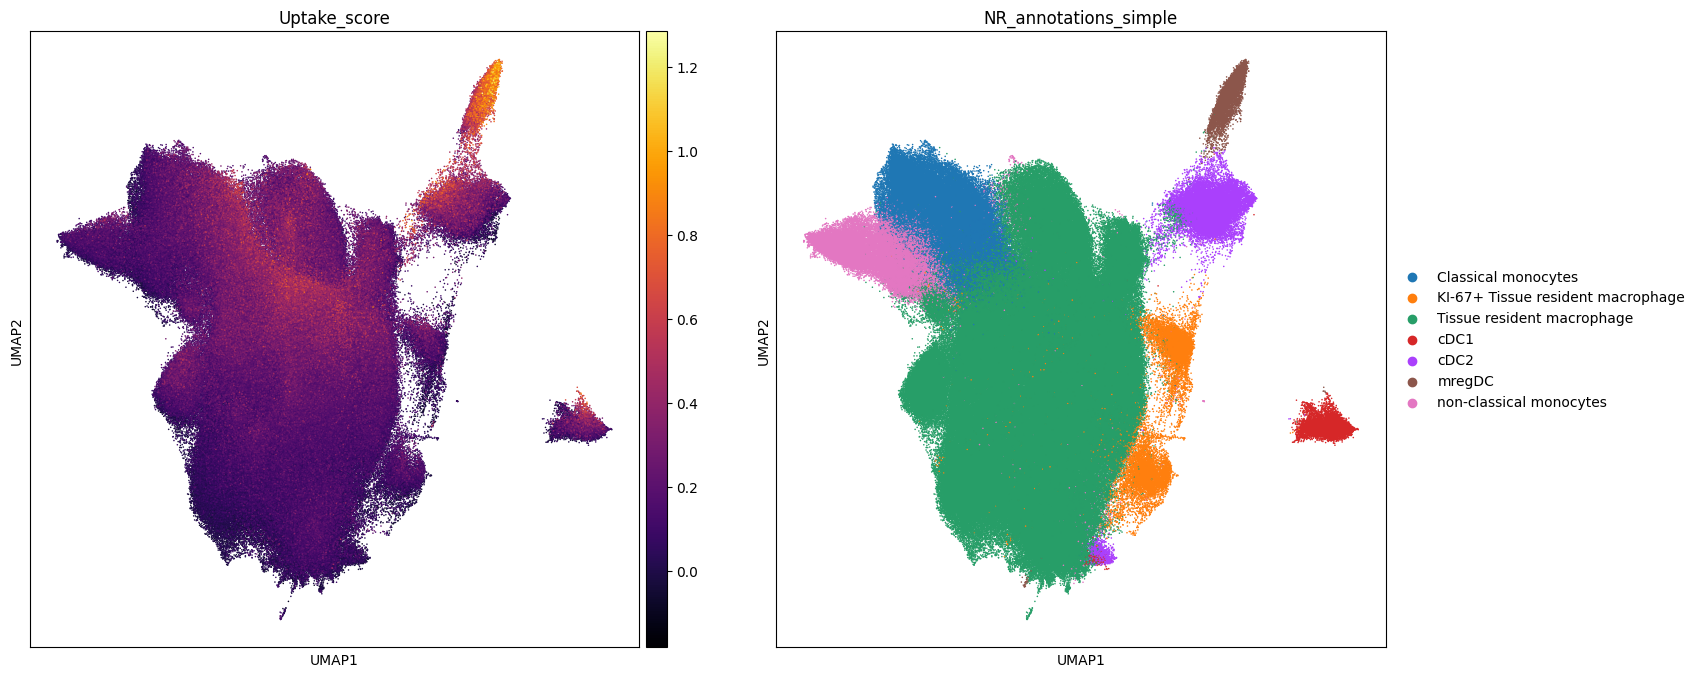

In [11]:
#plotting 
with plt.rc_context({"figure.figsize": (8, 8)}):
    sc.pl.umap(data, color=colour_vars, ncols=2, size=5, color_map="inferno")

### Invitro sigs from Liam: 

In [12]:
# make objects with sigs
#Note: each signature is top 100 (or less) upregulated DEGS in group compared to untreated. 4 or 18 refered to timepoint (hrs)
IFNbCD40_4 = ['IFI44L','DDX60','IFI44','IFIT1','CXCL10','HERC5','CXCL9','RSAD2','PDGFRL','IFIT3','OTOF','CXCL11','APOBEC3A','DDX60L','IFIT2','SERPING1','USP18','IFI27','ELOVL3','HERC6','XAF1','OAS3','ETV7','AL445490.1','TNFSF10','OAS2','ISG20','CCL8','KCTD14','SIDT1','ISG15','MX2','IFI6','AP001610.1','HELZ2','DDX58','MYH7','RUFY4','FXYD6','ALMS1P1','HESX1','OASL','MX1','CACNA1I','CMPK2','IFITM1','OAS1','CXCR2P1','BATF2','CCL2','IL12B','TBX1','BX255923.2','NUPR1','PRAL','APOL6','AL645608.7','IFNL3P1','PARP14','SLC25A3P1','NRIR','AP000757.1','AC112719.2','GCNT4','AMOTL2','SAA2','CFB','NAT8','LY6E','GBP4','SLC8A2','TFEC','RTP4','C5orf56','LGALS3BP','CD38','EPHB2','PAX5','AL133523.1','EPSTI1','STAT1','CASP10','STAP1','UBE2L6','GJA4','IFITM3','MNDA','NEXN','CCL13','LAMP3','SLC38A5','SMTNL1','EIF2AK2','TNFSF18','SLC1A3','TRIM14','ANO7L1','MBOAT4','SLFN5']
IFNb_4 = ['IFI44L','DDX60','IFI44','IFIT1','HERC5','OTOF','RSAD2','CXCL10','IFIT3','CXCL9','PDGFRL','DDX60L','SERPING1','APOBEC3A','IFI27','IFIT2','USP18','ELOVL3','CXCL11','XAF1','HERC6','AL445490.1','ETV7','OAS3','TNFSF10','ISG20','OAS2','ISG15','KCTD14','CCL8','SIDT1','MX2','IFI6','AP001610.1','MYH7','RUFY4','DDX58','BATF2','HELZ2','HESX1','OASL','CACNA1I','MX1','FXYD6','IFITM1','IFNL3P1','ALMS1P1','OAS1','CMPK2','TBX1','CXCR2P1','AP000757.1','NUPR1','CCL2','AL645608.7','APOL6','SLC8A2','RTP4','PARP14','LY6E','SLC25A3P1','LGALS3BP','C5orf56','NRIR','CFB','PAX5','GCNT4','CD38','MBOAT4','EPHB2','EPSTI1','PRAL','TRIM31','STAP1','UBE2L6','NAT8','CASP10','ANO7L1','TFEC','STAT1','IFITM3','MNDA','SLC38A5','TNFSF18','TRIM14','SMTNL1','AC136475.9','PZP','EIF2AK2','GBP4','SAA2','AL133523.1','AMOTL2','IRF6','DHX58','CCL13','KANK3','AC136475.5','IFI35']
IFNbCD40_18 = ['CBWD6','CCL19','IFI44L','IL12B','IFI27','CXCL11','CD70','EBI3','IFIT2','CCL5','NXPH3','ENTHD1','KCNK5','IFI44','CXCL9','IL27','IL2RA','COL5A3','GATA6','FXYD6','GNG4','LINC00158','CYP7B1','CXCL10','EXOC3L4','SERPING1','SLC1A3','ITGB8','PRAME','SLC6A12','TMCC2','CCL22','NUAK2','IFIT3','SYNPO','CD200','SYNM','TPPP','ACHE','MIR155HG','MATN2','SEMA4C','CFB','SYNPO2','UPB1','CD82','LAYN','ISG20','TNFAIP6','BHLHE22','ATOH8','SOCS2','LINC02154','C1orf61','EDARADD','MYO1B','HERC5','TCF7','IGSF3','SNN','JAG1','SLC6A13','HOPX','ANKRD33B','MGLL','OXTR','CCR7','TNFAIP3','TNFRSF9','KCNN1','SOCS2-AS1','AC003092.1','TNFAIP2','FAM186B','DDX60','FSCN1','NBL1','CCL13','CGN','ADORA2A','CAMK1G','IRF1','TREML1','GBP4','ADORA2A-AS1','BCL2A1','LRRC32','USP18','AC119427.1','XAF1','UNC13A','SIRPA','RSAD2','SEMA7A','GPR132','CITED4','ETV7','TNFSF9','SLC1A2']
IFNb_18 = ['IFI44L','IFI44','IFIT3','IFIT2','IFI27','RSAD2','SERPING1','CXCL11','CCL13','FXYD6','IFIT1','DDX60','CXCL10','XAF1','HERC5','RUFY4','USP18','CXCL9','DDX60L','CCL19','ISG20','CCL2','OAS2','HERC6','OASL','IFI6','OAS1','LGALS3BP','OAS3','RNF43','IFITM1','TNFSF10','HESX1','ISG15','GATA6','MYH7','ZNF385C','LINGO1','IFITM3','CFB','MX2','CMPK2','IL2RA','MX1','HELZ2','ETV7','ENTHD1','EXOC3L4','LY6E','CASP10','LILRA5','DDX58','KANK3','TFEC','MST1R','SYNPO2','GNG4','GBP4','SYNPO','STAT1','LINC00158','PRAME','CCR7','SLFN5','ANKRD33B','VTN','KCNN1','SEMA6B','NRXN2','FOXD4L1','C17orf99','LINC02154','DHX58','SIGLEC1','C1orf61','NID1','PLEKHG6','CLEC2D','IL4I1','AC119427.1','PHLDA1','DSP','AC003092.1','PELI2','SEMA4C','CCL5','NCF1B','NEURL3','RASGRP3','LIF','IL23R','LIPG','NUAK2','VANGL2','APOBEC3H','TMCC3','BATF2','TMEM51','STAP1']
IFNgCD40_18 = ['IL12B','BX255923.2','CXCL9','CCL5','CXCL11','LAYN','IL2RA','EBI3','IL27','CD70','EXOC3L4','LINC00158','ITGB8','CCL19','SYNPO2','GBP1','CXCL10','ENTHD1','GNG4','SLC6A12','GBP4','SLC1A3','NXPH3','C1orf61','SYNM','SERPING1','G0S2','PRAME','GBP5','COL5A3','CYP7B1','TMCC2','SEMA4C','KCNK5','GATA6','LINC02154','SYNPO','UPB1','ACHE','CD200','CFAP46','SLC6A13','ENTPD2','MIR155HG','NUAK2','CCL22','AC003092.1','FAM186B','UNC13A','TPPP','SOCS2-AS1','TNFAIP2','SOCS2','TNFAIP6','HOPX','TBX21','CAMK1G','ETV7','TNFAIP3','BHLHE22','IRF1','MGLL','FXYD6','CD82','SNN','EDARADD','JAG1','ISG20','SLC12A8','SLC1A2','ADORA2A-AS1','NBL1','ADORA2A','IGSF3','KCNN1','SAA1','MATN2','IL32','AC119427.1','OXTR','CGN','ASTL','ANKRD33B','ATOH8','BCL2A1','CFB','CCND2','CCR7','HAPLN3','GPR132','SEMA7A','PRR5L','TREML1','FSCN1','RAPGEF3','TCF7','IL4I1','LINC02541','TNFRSF9']
IFNg_18 = ['SERPING1','TBX21','CXCL9','CXCL11','GBP5','ETV7','RARRES3','IRF1','GBP2','IFIT2','RUFY4','GBP1','GBP4','LGALS3BP','SAMD4A','CCL19','HAPLN3','APOL6','HIVEP3','ISG20','SOCS1','CD7','ASCL2','GTF2IRD1','TGM2','LIF','CFB','AC003092.1','SLC6A12','STAT1','MYO7B','C5orf56','SECTM1','CD274','FOXC1','ABCC11','ALDH1A1','F3','CALHM6','LIPH','KIF5C','LDLRAD3','APBA2','WARS','VAMP5','LAP3','IDO1','ADGRB1','C1QB','IL15RA','UBE2L6','JAG1','TNFAIP2','NCF1C','MGLL','NCF1','BCL2A1','OPTN','BCL2L11','C1orf21','IL18BP','CD40','PARP14','EBF4','SOD2','ATF5','RUNX2','SFMBT2','EXT1','SLAMF7','IRF9','NLRC5','NFKBIZ','RNF213','BCL3','EPSTI1','SCARF1','ACSL1','ODF3B','NABP1','TXN','LINC-PINT','TYMP','TRAF3','STAT3']

In [13]:
#Score cells (note genes not included - highlighted red on excel)
sc.tl.score_genes(data, IFNbCD40_4, score_name='IFNbCD40_4_score')

       'PRAL', 'AL645608.7', 'IFNL3P1', 'SLC25A3P1', 'NRIR', 'AP000757.1',
       'AC112719.2', 'NAT8', 'C5orf56', 'AL133523.1', 'SMTNL1', 'ANO7L1'],
      dtype='object')


In [14]:
sc.tl.score_genes(data, IFNb_4, score_name='IFNb_4_score')

       'AP000757.1', 'AL645608.7', 'SLC25A3P1', 'C5orf56', 'NRIR', 'PRAL',
       'NAT8', 'ANO7L1', 'SMTNL1', 'AC136475.9', 'AL133523.1', 'AC136475.5'],
      dtype='object')


In [15]:
sc.tl.score_genes(data, IFNbCD40_18, score_name='IFNbCD40_18_score')

       'AC119427.1'],
      dtype='object')


In [16]:
sc.tl.score_genes(data, IFNb_18, score_name='IFNb_18_score')

In [17]:
sc.tl.score_genes(data, IFNgCD40_18, score_name='IFNgCD40_18_score')

       'ADORA2A-AS1', 'AC119427.1', 'LINC02541'],
      dtype='object')


In [18]:
sc.tl.score_genes(data, IFNg_18, score_name='IFNg_18_score')

       'LINC-PINT'],
      dtype='object')


In [19]:
#Score cells (DC only)
sc.tl.score_genes(data_DC, IFNbCD40_4, score_name='IFNbCD40_4_score')
sc.tl.score_genes(data_DC, IFNb_4, score_name='IFNb_4_score')
sc.tl.score_genes(data_DC, IFNbCD40_18, score_name='IFNbCD40_18_score')
sc.tl.score_genes(data_DC, IFNb_18, score_name='IFNb_18_score')
sc.tl.score_genes(data_DC, IFNgCD40_18, score_name='IFNgCD40_18_score')
sc.tl.score_genes(data_DC, IFNg_18, score_name='IFNg_18_score')

       'PRAL', 'AL645608.7', 'IFNL3P1', 'SLC25A3P1', 'NRIR', 'AP000757.1',
       'AC112719.2', 'NAT8', 'C5orf56', 'AL133523.1', 'SMTNL1', 'ANO7L1'],
      dtype='object')
       'AP000757.1', 'AL645608.7', 'SLC25A3P1', 'C5orf56', 'NRIR', 'PRAL',
       'NAT8', 'ANO7L1', 'SMTNL1', 'AC136475.9', 'AL133523.1', 'AC136475.5'],
      dtype='object')
       'AC119427.1'],
      dtype='object')
       'ADORA2A-AS1', 'AC119427.1', 'LINC02541'],
      dtype='object')
       'LINC-PINT'],
      dtype='object')


In [20]:
colour_vars = ["IFNbCD40_4_score","IFNb_4_score","IFNbCD40_18_score","IFNb_18_score","IFNgCD40_18_score","IFNg_18_score","Uptake_score","NR_annotations_simple"]

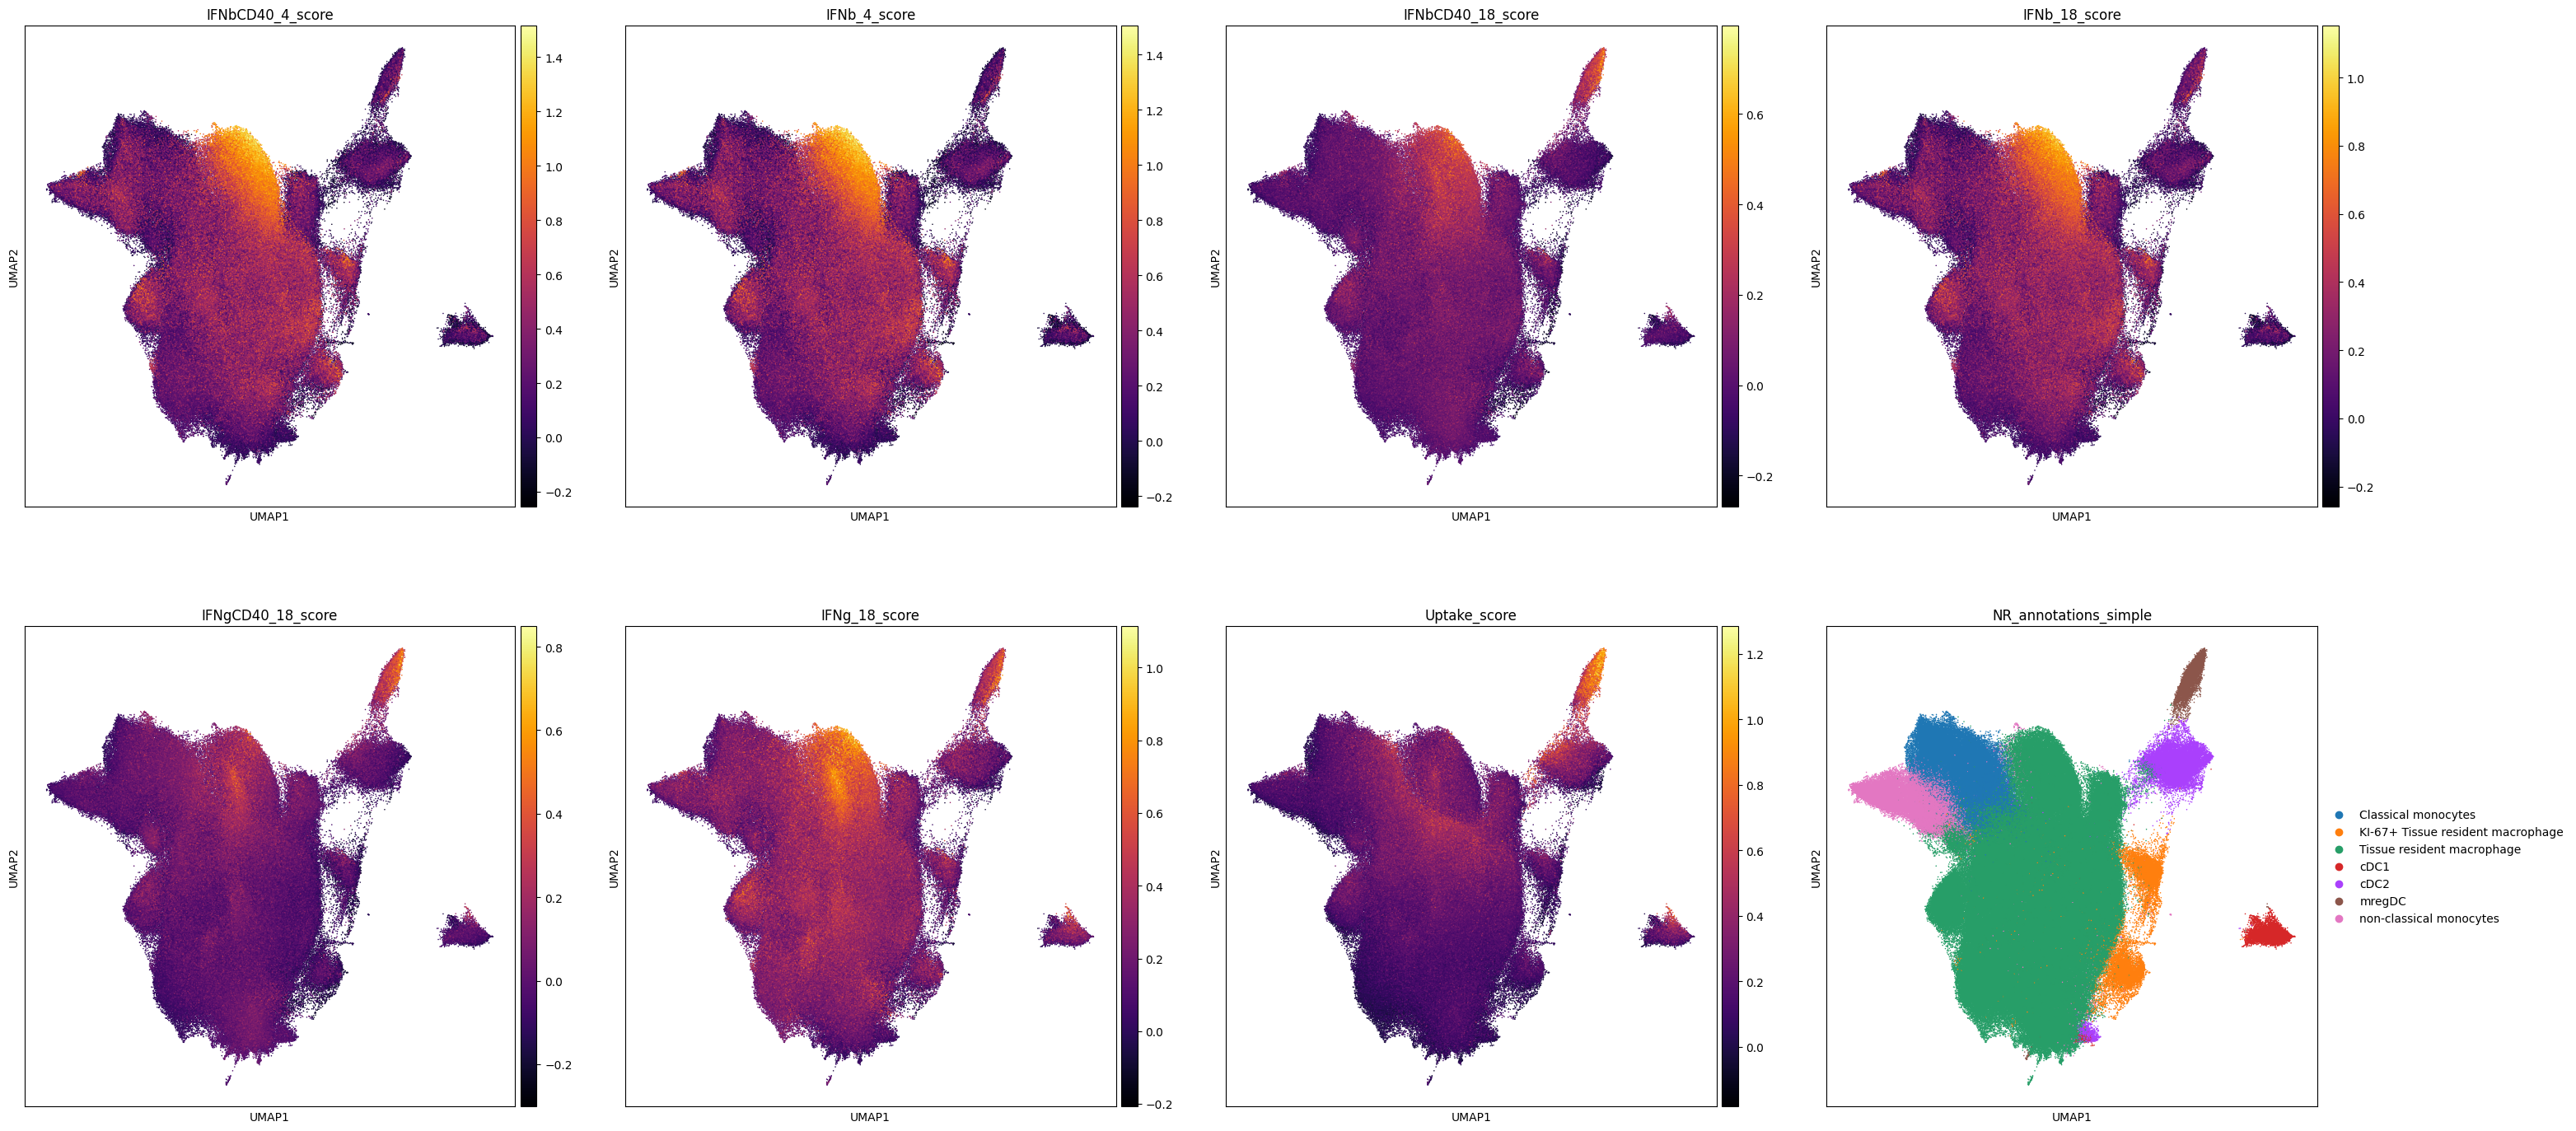

In [26]:
#plotting 
with plt.rc_context({"figure.figsize": (8, 8)}):
    sc.pl.umap(data, color=colour_vars, ncols=4, size=5, color_map="inferno")

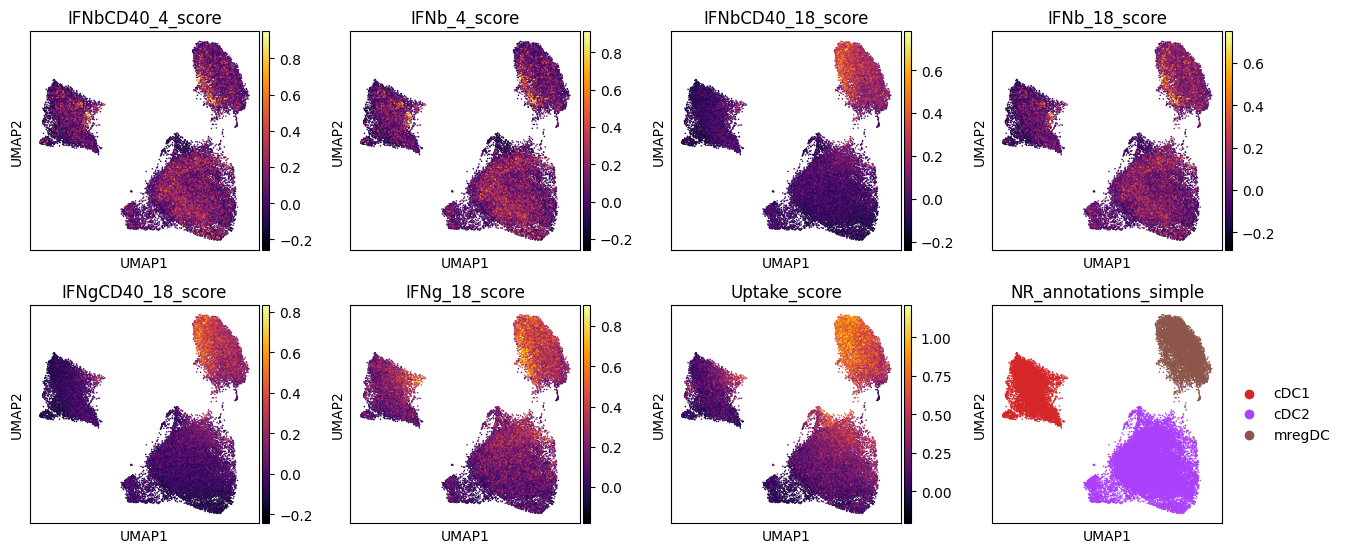

In [25]:
#plotting 
with plt.rc_context({"figure.figsize": (3, 3)}):
    sc.pl.umap(data_DC, color=colour_vars, ncols=4, size=5, color_map="inferno")

### IFNb sig highest in top right mac cluster, investigating what this cluster is:

In [27]:
data

AnnData object with n_obs × n_vars = 498023 × 1268
    obs: 'nCount_RNA', 'nFeature_RNA', 'sample_type', 'cancer_type', 'patient_id', 'sample_id', 'percent.mt', 'site', 'sample_type_major', 'cancer_subtype', 'integration_id', 'ident', 'dataset_id', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'S_score', 'G2M_score', 'keep_or_remove', 'leiden', 'celltype', 'leiden_DC', 'leiden_DC_v2', 'exclude_annots', 'leiden_M', 'Technology', 'cancer_type_broad', 'clean-leiden_0.8', 'clean-subcluster', 'clean-subcluster-v2', 'YS_sig', 'HSC_sig', 'CD5nDC2_up_vDC3', 'DC3_up_vCD5nDC2', 'CD5pDC2_up_vDC3', 'DC3_up_vCD5pDC2', 'DC3_up_vMono', 'Mono_up_vDC3', 'DC1_sig', 'DC2_sig', 'DC3_sig', 'DC_Axl_sig', 'DC2_up_DC3', 'DC3_up_DC2', 'mregDC_sig', 'cDC1_mregDC', 'cDC2_mregDC', 'NR_annotati

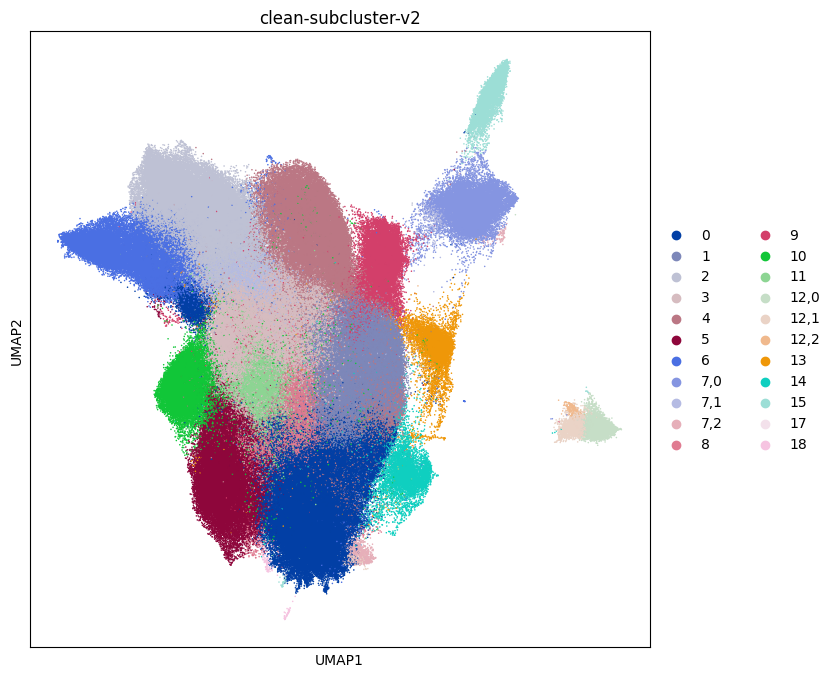

In [28]:
with plt.rc_context({"figure.figsize": (8, 8)}):
    sc.pl.umap(data, color=["clean-subcluster-v2"], ncols=3, size=5, color_map="inferno")

### Therefore, the cluster of interest is cluster 4 in clean-subcluster-v2

In [30]:
#calculate DEG genes (12min):
sc.tl.rank_genes_groups(data, groupby="clean-subcluster-v2", method="wilcoxon")

/home/s4436039/miniforge3/envs/env/lib/python3.12/site-packages/scanpy/tools/_rank_genes_groups.py:435: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
/home/s4436039/miniforge3/envs/env/lib/python3.12/site-packages/scanpy/tools/_rank_genes_groups.py:437: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
/home/s4436039/miniforge3/envs/env/lib/python3.12/site-packages/scanpy/tools/_rank_genes_groups.py:440: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor p

categories: 0, 1, 2, etc.
var_group_labels: Classical monocytes, KI-67+ Tissue resident macrophage, Tissue resident macrophage, etc.


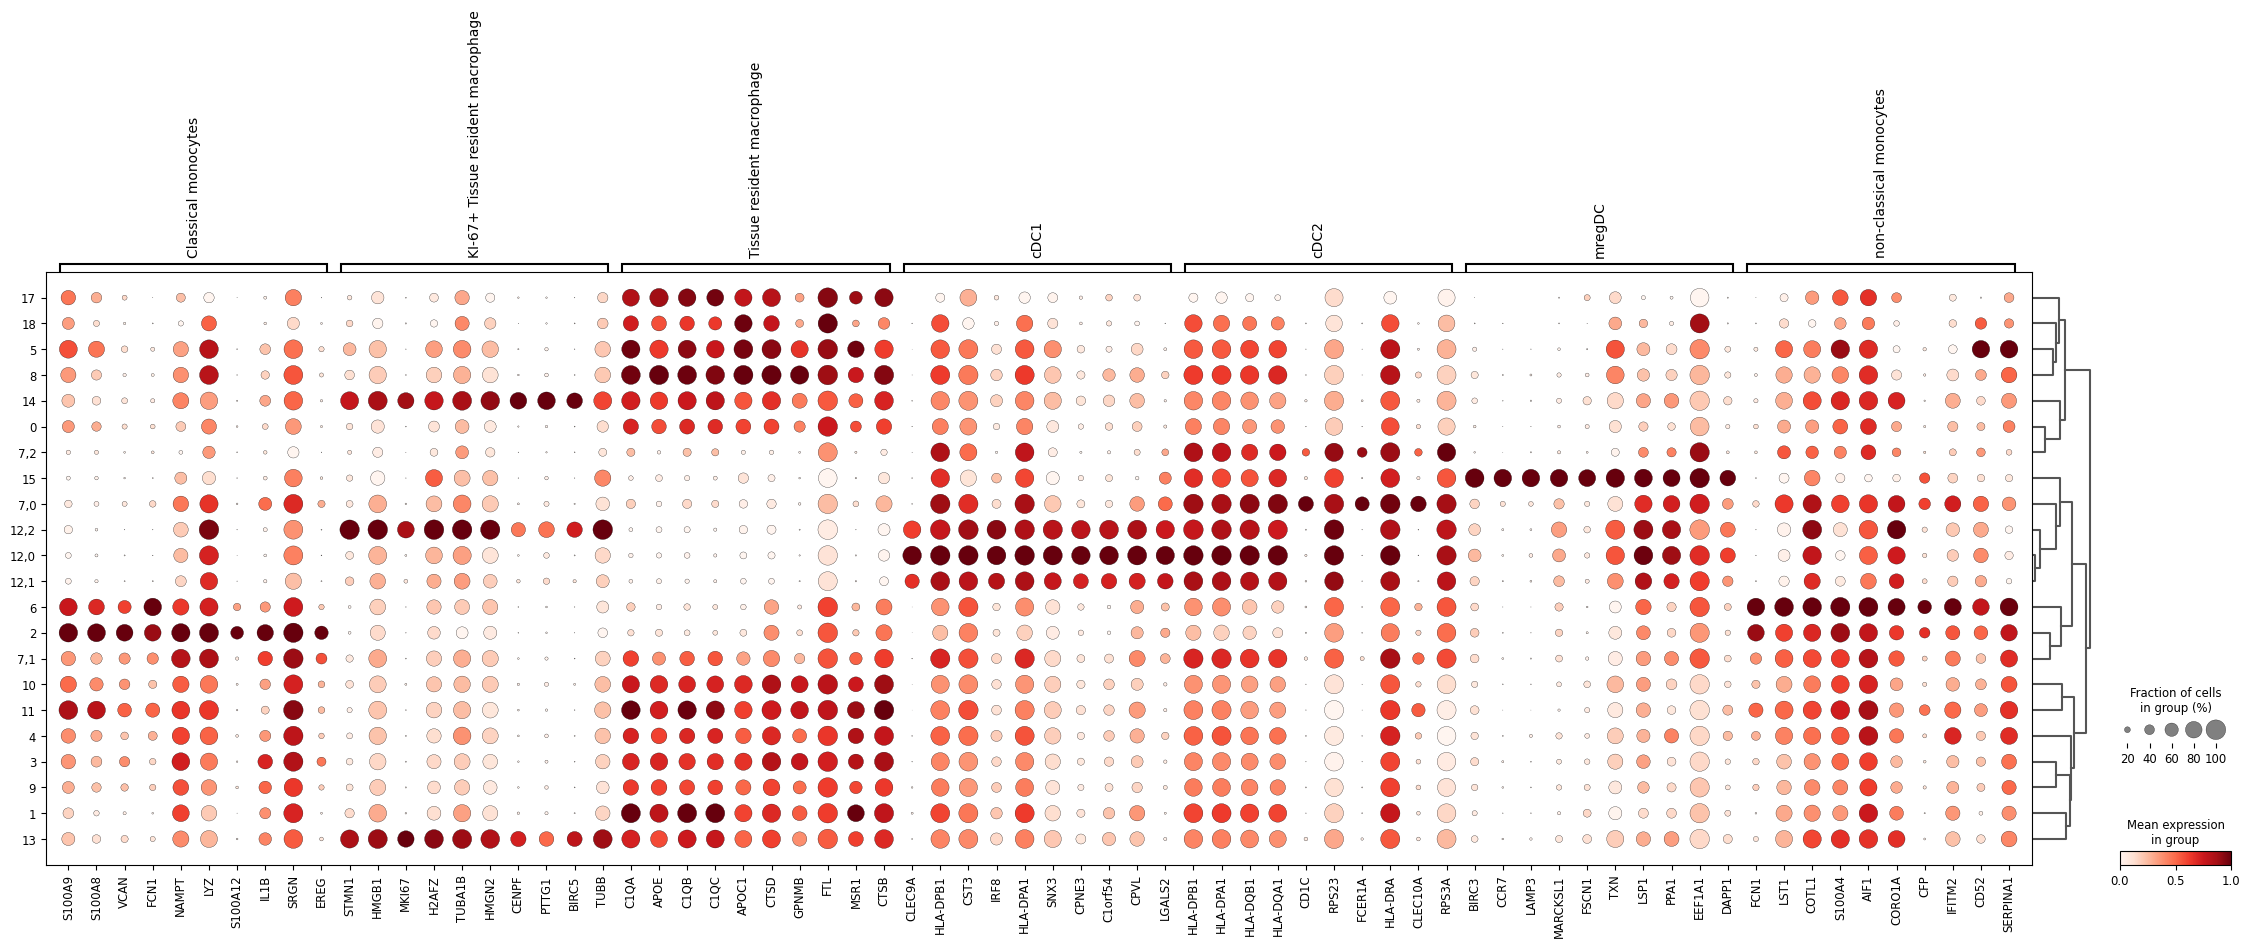

In [29]:
#visualise the top 20 DEG genes for each cluster
sc.pl.rank_genes_groups_dotplot(
    data, groupby="clean-subcluster-v2", standard_scale="var", n_genes=10, min_logfoldchange=1
)

In [ ]:
myeloid_genes = {
    "DC": ["HLA-DRA"],
    "cDC1": ["CLEC9A", "XCR1","BATF3","IRF8","FLT1"],
    "cDC2": ["CD1C", "FCER1A", "CLEC10A","CD5","IRF4"],
    "DC3": ["CD1C","FCER1A","CD14","CD163","CSF2RA","CSF2RB"],
    "mregDC": ["LAMP3","CD274","CCR7"],
    "Monocytes": ["CD14", "FCGR3A","CD163","LYZ","S100A8","S100A9","CCR2"],
    "Macrophages": ["FCGR1A", "CD68","CSF1R","TREM2","SPP1","CX3CR1","AIF1"],
    "Tissue Res Macs": ["C1QA","C1QB","C1QC","BTK","C3AR1","CCR1","MERTK"],
    "Proliferating": ["MKI67"]
}

In [ ]:
sc.pl.dotplot(data, myeloid_genes, groupby="clean-subcluster-v2", standard_scale="var")

## Are the macs associated with the IFNb signature more enriched in any particular cancer type?